## Redes Neurais Artificiais 2020.1

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta terceira parte do Projeto Prático 3 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

In [34]:
## Reservado para a importação de bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import numpy as np
from numpy import savetxt
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import sample
from math import sqrt

1. Abra a base de dados em questão

In [2]:
dataset = pd.read_csv('../dataset/covtype.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dados_drive = pd.read_csv('/content/drive/My Drive/PP3/covtype.csv')
dados_drive

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


2. Elimine todas as colunas relativas aos atributos categóricos

In [3]:
dados = dataset

for i in range(40):
    dados = dados.drop(columns=[f'Soil_Type{i+1}'])
#    dados_drive = dados_drive.drop(columns=[f'Soil_Type{i+1}'])
for i in range(4):
    dados = dados.drop(columns=[f'Wilderness_Area{i+1}'])
 #   dados_drive = dados_drive.drop(columns=[f'Wilderness_Area{i+1}'])



In [4]:
dados.columns
#dados_drive.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type'],
      dtype='object')

3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória

In [5]:
x = dados.drop("Cover_Type", axis = 1)
y = dados.Cover_Type

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [7]:
#escalonamento
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)


In [19]:
#Treine um rede neural
mlp = MLPClassifier(hidden_layer_sizes= (10,), activation= "relu", solver= 'adam', max_iter= 300, verbose= True)
mlp.fit(X_train_std, Y_train)

Iteration 1, loss = 0.89339689
Iteration 2, loss = 0.69752547
Iteration 3, loss = 0.67788679
Iteration 4, loss = 0.67151760
Iteration 5, loss = 0.66781257
Iteration 6, loss = 0.66525704
Iteration 7, loss = 0.66312242
Iteration 8, loss = 0.66152182
Iteration 9, loss = 0.66053588
Iteration 10, loss = 0.65979325
Iteration 11, loss = 0.65910961
Iteration 12, loss = 0.65857995
Iteration 13, loss = 0.65797375
Iteration 14, loss = 0.65708109
Iteration 15, loss = 0.65573319
Iteration 16, loss = 0.65466793
Iteration 17, loss = 0.65391317
Iteration 18, loss = 0.65309043
Iteration 19, loss = 0.65260069
Iteration 20, loss = 0.65233650
Iteration 21, loss = 0.65201485
Iteration 22, loss = 0.65149439
Iteration 23, loss = 0.65089379
Iteration 24, loss = 0.65055556
Iteration 25, loss = 0.65012328
Iteration 26, loss = 0.64984130
Iteration 27, loss = 0.64960240
Iteration 28, loss = 0.64939944
Iteration 29, loss = 0.64926030
Iteration 30, loss = 0.64912347
Iteration 31, loss = 0.64907555
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [ ]:
predictions = mlp.predict(X_test_std)

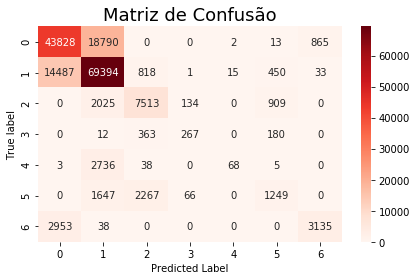

In [ ]:
#Imprimir Matriz de Confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

In [ ]:
print('Acurácia: ', accuracy_score(Y_test,predictions))
print('F-Score: ', f1_score(Y_test,predictions, average= 'macro'))
print('Precisão: ', precision_score(Y_test,predictions, average= 'macro'))
print('Revocação: ', recall_score(Y_test,predictions, average= 'macro'))

Acurácia:  0.7197425188176978
F-Score:  0.5084195687078504
Precisão:  0.674938526937111
Revocação:  0.4734380020492974


7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino

Vale resaltar que foram realizadas somente 10 repetições nos próximos treinamentos, por conta do tempo de processamento.

In [8]:
#7
score= np.zeros(10)
acuracia = np.zeros(10)

for i in range(10):
    #print('Indo')
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
    mlp = MLPClassifier(hidden_layer_sizes= (10,), activation= "relu", solver= 'adam', max_iter= 300, verbose= False)
    mlp.fit(X_train_std, Y_train)
    predictions = mlp.predict(X_test_std)
  
    acuracia[i]= accuracy_score(Y_test,predictions)
    score[i]= f1_score(Y_test,predictions, average= 'macro')

In [9]:
print("Média da Acurácia: ",acuracia.mean())
print("Desvio Padrão da Acurácia: ", acuracia.std())
print("Média do F1-Score: ", score.mean())
print("Desvio Padrão do F1-Score: ", score.std())

Média da Acurácia:  0.7165578529465761
Desvio Padrão da Acurácia:  0.00454063881670014
Média do F1-Score:  0.5141845146688165
Desvio Padrão do F1-Score:  0.016529517104351254


In [8]:
#Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD

score= np.zeros(10)
acuracia = np.zeros(10)

for i in range(10):
    #print('Indo')
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
    mlp = MLPClassifier(hidden_layer_sizes= (10,), activation= "relu", solver= 'sgd', max_iter= 300, verbose= False)
    mlp.fit(X_train_std, Y_train)
    predictions = mlp.predict(X_test_std)
  
    acuracia[i]= accuracy_score(Y_test,predictions)
    score[i]= f1_score(Y_test,predictions, average= 'macro')

In [9]:
print("Média da Acurácia: ",acuracia.mean())
print("Desvio Padrão da Acurácia: ", acuracia.std())
print("Média do F1-Score: ", score.mean())
print("Desvio Padrão do F1-Score: ", score.std())

Média da Acurácia:  0.7114415044978888
Desvio Padrão da Acurácia:  0.002251417066186162
Média do F1-Score:  0.4715798573070494
Desvio Padrão do F1-Score:  0.020238609408504808


9. Houve influência da escolha do otimizador no desempenho da rede?

- sim, pois o otimizador adam teve resultados ligeiramente superiores do que o SGD e seu tempo de treinamento foi menor do que o SGD o que nos mostra uma arquitetrua mais eficiente.

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

In [10]:

 conf = [1, 'identity', 'adam', 100, 16, 
       1, 'logistic', 'sgd', 150, 13, 
       1, 'tanh', 'adam', 200, 16, 
       1, 'relu', 'sgd', 100, 17, 
       1, 'identity', 'sgd', 150, 10, 
       2, 'logistic', 'adam', 200, (10, 12), 
       2, 'tanh', 'sgd', 100, (13, 15), 
       2, 'relu', 'adam', 150, (19, 16),
       2, 'identity', 'adam', 200, (11, 13), 
       2, 'relu', 'sgd', 100, (10, 15)]

In [11]:
df_confgs = pd.DataFrame(np.array(conf).reshape(10,5), columns = ["Camadas",
                    'Função de Ativação',
                    'Hiperparametro',
                    'Épocas',
                    'Neurônios'])
            
df_confgs["Épocas"] = pd.to_numeric(df_confgs["Épocas"])
print (df_confgs)

  Camadas Função de Ativação Hiperparametro  Épocas Neurônios
0       1           identity           adam     100        16
1       1           logistic            sgd     150        13
2       1               tanh           adam     200        16
3       1               relu            sgd     100        17
4       1           identity            sgd     150        10
5       2           logistic           adam     200  (10, 12)
6       2               tanh            sgd     100  (13, 15)
7       2               relu           adam     150  (19, 16)
8       2           identity           adam     200  (11, 13)
9       2               relu            sgd     100  (10, 15)


In [ ]:
score= np.zeros(10)
acuracia = np.zeros(10)

medias_acuracia = np.zeros(10)
medias_f1score = np.zeros(10)

dp_acuracia = np.zeros(10)
dp_f1score = np.zeros(10)

for i in range(10):
    print("Executando Configuração: ", i+1)
    mlp = MLPClassifier(hidden_layer_sizes= df_confgs['Neurônios'][i], activation= df_confgs['Função de Ativação'][i], solver= df_confgs['Hiperparametro'][i], max_iter= df_confgs['Épocas'][i], verbose= False)

    for j in range(10):
       
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
        X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
        X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
       
        mlp.fit(X_train_std, Y_train)
        predictions = mlp.predict(X_test_std)
  
        acuracia[j]= accuracy_score(Y_test,predictions)
        score[j]= f1_score(Y_test,predictions, average= 'macro')

    medias_acuracia[i] = acuracia.mean()
    medias_f1score[i] = score.mean()

    dp_acuracia[i] = acuracia.std()
    dp_f1score[i] = score.std()

Executando Configuração:  1
Executando Configuração:  2
Executando Configuração:  3
Executando Configuração:  4
Executando Configuração:  5
Executando Configuração:  6
Executando Configuração:  7
Executando Configuração:  8
Executando Configuração:  9
Executando Configuração:  10


In [ ]:
df_top = df_confgs
df_top['media acuracia'] = medias_acuracia 
df_top['media f1 score'] = medias_f1score

In [ ]:
df_top

,Camadas,Função de Ativação,Hiperparametro,Épocas,Neurônios,media acuracia,media f1 score
0,1,identity,adam,100,16,0.697669,0.434251
1,1,logistic,sgd,150,13,0.713400,0.417219
2,1,tanh,adam,200,16,0.732727,0.561248
3,1,relu,sgd,100,17,0.722878,0.505038
4,1,identity,sgd,150,10,0.697107,0.421017
5,2,logistic,adam,200,"(10, 12)",0.738323,0.553270
6,2,tanh,sgd,100,"(13, 15)",0.739604,0.528853
7,2,relu,adam,150,"(19, 16)",0.761886,0.624660
8,2,identity,adam,200,"(11, 13)",0.697758,0.431017
9,2,relu,sgd,100,"(10, 15)",0.729426,0.528803


In [ ]:
df_top.sort_values([ 'media acuracia'], ascending= [False], kind= 'mergesort')

,Camadas,Função de Ativação,Hiperparametro,Épocas,Neurônios,media acuracia,media f1 score
7,2,relu,adam,150,"(19, 16)",0.761886,0.624660
6,2,tanh,sgd,100,"(13, 15)",0.739604,0.528853
5,2,logistic,adam,200,"(10, 12)",0.738323,0.553270
2,1,tanh,adam,200,16,0.732727,0.561248
9,2,relu,sgd,100,"(10, 15)",0.729426,0.528803
3,1,relu,sgd,100,17,0.722878,0.505038
1,1,logistic,sgd,150,13,0.713400,0.417219
8,2,identity,adam,200,"(11, 13)",0.697758,0.431017
0,1,identity,adam,100,16,0.697669,0.434251
4,1,identity,sgd,150,10,0.697107,0.421017


In [ ]:
df_top.sort_values(['media f1 score'], ascending= False)

,Camadas,Função de Ativação,Hiperparametro,Épocas,Neurônios,media acuracia,media f1 score
7,2,relu,adam,150,"(19, 16)",0.761886,0.624660
2,1,tanh,adam,200,16,0.732727,0.561248
5,2,logistic,adam,200,"(10, 12)",0.738323,0.553270
6,2,tanh,sgd,100,"(13, 15)",0.739604,0.528853
9,2,relu,sgd,100,"(10, 15)",0.729426,0.528803
3,1,relu,sgd,100,17,0.722878,0.505038
0,1,identity,adam,100,16,0.697669,0.434251
8,2,identity,adam,200,"(11, 13)",0.697758,0.431017
4,1,identity,sgd,150,10,0.697107,0.421017
1,1,logistic,sgd,150,13,0.713400,0.417219


Escolhendo top 3:
- De acordo com a média de acuracia as melhores configurações foram as com indice 7,6 e 5. Já segundo a F1 score foram as 7, 2 e 5. Observando que as configurações 7 e 5 foram as melhores em ambas, consideramos a terceira configuração sendo a 2, pois a acurácia pode ser usada quando a distribuição da classe é semelhante, enquanto a pontuação F1 score é uma métrica melhor quando há classes desbalanceadas, que é o nosso caso.

In [12]:
vetor_top = [7, 2, 5]

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

In [14]:

def fit(neuronios, func_ativacao, hiperparametro, epocas):

    mlp = MLPClassifier(hidden_layer_sizes=neuronios, activation= func_ativacao, solver= hiperparametro, max_iter=epocas, verbose= False)
    mlp.fit(X_train_std, Y_train)
    predictions = mlp.predict(X_test_std)

    return(predictions)

In [15]:
resultados = []
for i in vetor_top:
    resultados.append(fit(df_confgs['Neurônios'][i], df_confgs['Função de Ativação'][i], df_confgs['Hiperparametro'][i], df_confgs['Épocas'][i]))

In [45]:
# tp, tf, fp e fn
for i in range(3):
    matriz_confusao = confusion_matrix(Y_test, resultados[i])

    FP = matriz_confusao.sum(axis=0) - np.diag(matriz_confusao)  
    FN = matriz_confusao.sum(axis=1) - np.diag(matriz_confusao)
    TP = np.diag(matriz_confusao)
    TN = matriz_confusao.sum() - (FP + FN + TP)

    print(i+1,'ª ARQUITETURA')
    print("TP: ", TP)
    print("TN: ", TN)
    print("FP: ", FP)
    print("FP: ", FP)

1 ª ARQUITETURA
TP:  [48520 68586  8227   462   696  1438  3484]
TN:  [ 93605  69744 159917 173367 170923 167899 167478]
FP:  [17143 19482  3749   142   440  1178   757]
FP:  [17143 19482  3749   142   440  1178   757]
2 ª ARQUITETURA
TP:  [45433 68716  8302   308   438   952  3439]
TN:  [ 93624  66923 158996 173395 171145 168042 166983]
FP:  [17124 22303  4670   114   218  1035  1252]
FP:  [17124 22303  4670   114   218  1035  1252]
3 ª ARQUITETURA
TP:  [44958 70273  7927   233   462  1310  3380]
TN:  [ 94951  66111 159681 173424 171151 167545 167200]
FP:  [15797 23115  3985    85   212  1532  1035]
FP:  [15797 23115  3985    85   212  1532  1035]


Ilustração do TP, FN, TP, TN. Vale resaltar que esses valores podem ser encontrados nas matrizes de confusão abaixo.

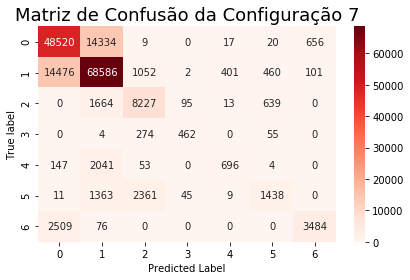

In [38]:

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_test, resultados[0]), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão da Configuração 7", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

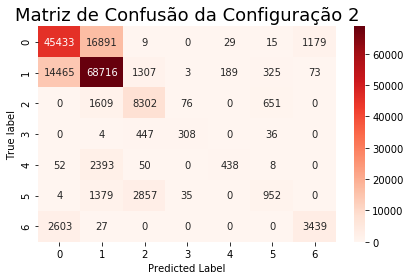

In [46]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_test, resultados[1]), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão da Configuração 2", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

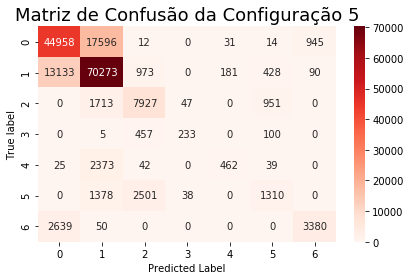

In [47]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_test, resultados[2]), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão da Configuração 5", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

In [20]:
def piramide_geometrica(alfa, ni, no):
    return int(alfa * sqrt(ni * no))

no = mlp.n_outputs_
ni = x.columns.size

neuronios_ocultos = [
  piramide_geometrica(0.5, ni, no),
  piramide_geometrica(2, ni, no),
  piramide_geometrica(3, ni, no)
]

print(neuronios_ocultos)


[4, 16, 25]


In [21]:
conf_piramide = [1, 'identity', 'adam', 100, 21, 
  1, 'logistic', 'sgd', 150, 3, 
  1, 'tanh', 'adam', 200, 17, 
  1, 'relu', 'sgd', 100, 7, 
  1, 'identity', 'sgd', 150, 4, 
  2, 'logistic', 'adam', 200, (3, 13), 
  2, 'tanh', 'sgd', 100, (13, 3),
  2, 'relu', 'adam', 150, (20, 5),
  2, 'identity', 'adam', 200, (3, 1),
  2, 'relu', 'sgd', 100, (1, 15),
  1, 'identity', 'adam', 100, 25,
  1, 'logistic', 'sgd', 150, 2,
  1, 'tanh', 'adam', 200, 20,
  1, 'relu', 'sgd', 100, 19,
  1, 'identity', 'sgd', 200, 13,
  2, 'logistic', 'adam', 200, (15,10),
  2, 'tanh', 'sgd', 100, (8, 8),
  2, 'relu', 'adam', 150, (5, 11),
  2, 'identity', 'adam', 200, (11, 5), 
  2, 'relu', 'sgd', 100, (9, 7),
  1, 'identity', 'adam', 100, 11, 
  1, 'logistic', 'sgd', 150, 14,
  1, 'tanh', 'adam', 200, 16,
  1, 'relu', 'sgd', 100, 18,
  1, 'identity', 'sgd', 150, 10,
  2, 'logistic', 'adam', 200, (10, 15),
  2, 'tanh', 'sgd', 100, (2, 2),
  2, 'relu', 'adam', 150, (7, 18),
  2, 'identity', 'adam', 200, (18, 7), 
  2, 'relu', 'sgd', 100, (1, 3)]

len(conf_piramide)

150

In [23]:
df_confgs = pd.DataFrame(np.array(conf_piramide).reshape(30,5), columns = ["Camadas",
                    'Função de Ativação',
                    'Hiperparametro',
                    'Épocas',
                    'Neurônios'])
            
df_confgs["Épocas"] = pd.to_numeric(df_confgs["Épocas"])
print (df_confgs)

   Camadas Função de Ativação Hiperparametro  Épocas Neurônios
0        1           identity           adam     100        21
1        1           logistic            sgd     150         3
2        1               tanh           adam     200        17
3        1               relu            sgd     100         7
4        1           identity            sgd     150         4
5        2           logistic           adam     200   (3, 13)
6        2               tanh            sgd     100   (13, 3)
7        2               relu           adam     150   (20, 5)
8        2           identity           adam     200    (3, 1)
9        2               relu            sgd     100   (1, 15)
10       1           identity           adam     100        25
11       1           logistic            sgd     150         2
12       1               tanh           adam     200        20
13       1               relu            sgd     100        19
14       1           identity            sgd     200   

In [27]:
TOTAL_CONFIG = 30
ITERATIONS = 10
score= np.zeros(ITERATIONS)
acuracia = np.zeros(ITERATIONS)

medias_acuracia = np.zeros(TOTAL_CONFIG)
medias_f1score = np.zeros(TOTAL_CONFIG)

dp_acuracia = np.zeros(TOTAL_CONFIG)
dp_f1score = np.zeros(TOTAL_CONFIG)

for i in range(TOTAL_CONFIG):
    print("Executando Configuração: ", i+1)
    mlp = MLPClassifier(hidden_layer_sizes= df_confgs['Neurônios'][i], activation= df_confgs['Função de Ativação'][i], solver= df_confgs['Hiperparametro'][i], max_iter= df_confgs['Épocas'][i], verbose= False)

    for j in range(ITERATIONS):
       
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
        X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
        X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
       
        mlp.fit(X_train_std, Y_train)
        predictions = mlp.predict(X_test_std)
  
        acuracia[j]= accuracy_score(Y_test,predictions)
        score[j]= f1_score(Y_test,predictions, average= 'macro')

    medias_acuracia[i] = acuracia.mean()
    medias_f1score[i] = score.mean()

    dp_acuracia[i] = acuracia.std()
    dp_f1score[i] = score.std()
  
savetxt('/content/drive/My Drive/PP3/media-acuracia.csv', medias_acuracia, delimiter=',')
savetxt('/content/drive/My Drive/PP3/media-f1score.csv', medias_f1score, delimiter=',')
savetxt('/content/drive/My Drive/PP3/dp-acuracia.csv', dp_acuracia, delimiter=',')
savetxt('/content/drive/My Drive/PP3/dp-f1score.csv', dp_f1score, delimiter=',')

Executando Configuração:  1
Executando Configuração:  2


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  3


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  4


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  5
Executando Configuração:  6
Executando Configuração:  7


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  8


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  9
Executando Configuração:  10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  11
Executando Configuração:  12


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  13
Executando Configuração:  14


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  15
Executando Configuração:  16


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  17


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  18


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  19
Executando Configuração:  20


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  21
Executando Configuração:  22


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  23
Executando Configuração:  24


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  25
Executando Configuração:  26


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  27


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  28


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  29
Executando Configuração:  30


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [29]:
df_top = df_confgs
df_top['media acuracia'] = medias_acuracia 
df_top['media f1 score'] = medias_f1score

In [37]:
top3_piramide = df_top.sort_values(['media f1 score', 'media acuracia'], ascending= [False, False], kind='mergesort').head(3)
top3_piramide

,Camadas,Função de Ativação,Hiperparametro,Épocas,Neurônios,media acuracia,media f1 score
12,1,tanh,adam,200,20,0.740016,0.577694
27,2,relu,adam,150,"(7, 18)",0.733824,0.569738
15,2,logistic,adam,200,"(15, 10)",0.745405,0.563758


## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

In [7]:
x = dados_drive.drop("Cover_Type", axis = 1)
y = dados_drive.Cover_Type

config = [2,'relu',	'adam',	200,	(19, 16),
  1,	'tanh', 'adam',	200,	16,
	2,	'logistic', 'adam',	200,(10, 12),
  1,	'tanh',	'adam',	200, 20,
  2,	'relu',	'adam', 200, (7, 18),
  2,	'logistic',	'adam',	200, (15, 10)]

In [8]:
df_confgs = pd.DataFrame(np.array(config).reshape(6,5), columns = ["Camadas",
                    'Função de Ativação',
                    'Hiperparametro',
                    'Épocas',
                    'Neurônios'])
            
df_confgs["Épocas"] = pd.to_numeric(df_confgs["Épocas"])
print("Dataframe com as arquitetura dos dois top3")
print(df_confgs)

Dataframe com as arquitetura dos dois top3
  Camadas Função de Ativação Hiperparametro  Épocas Neurônios
0       2               relu           adam     200  (19, 16)
1       1               tanh           adam     200        16
2       2           logistic           adam     200  (10, 12)
3       1               tanh           adam     200        20
4       2               relu           adam     200   (7, 18)
5       2           logistic           adam     200  (15, 10)


In [46]:
TOTAL_CONFIG = 6
ITERATIONS = 10
score = np.zeros(ITERATIONS)
acuracia = np.zeros(ITERATIONS)

scores = np.array([])

medias_acuracia = np.zeros(TOTAL_CONFIG)
medias_f1score = np.zeros(TOTAL_CONFIG)

dp_acuracia = np.zeros(TOTAL_CONFIG)
dp_f1score = np.zeros(TOTAL_CONFIG)

for i in range(TOTAL_CONFIG):
    print("Executando Configuração: ", i+1)
    mlp = MLPClassifier(hidden_layer_sizes= df_confgs['Neurônios'][i], activation= df_confgs['Função de Ativação'][i], solver= df_confgs['Hiperparametro'][i], max_iter= df_confgs['Épocas'][i], verbose= False)

    for j in range(ITERATIONS):
       
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
        X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
        X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
       
        mlp.fit(X_train_std, Y_train)
        predictions = mlp.predict(X_test_std)
  
        acuracia[j]= accuracy_score(Y_test,predictions)
        score[j]= f1_score(Y_test,predictions, average= 'macro')

    medias_acuracia[i] = acuracia.mean()
    medias_f1score[i] = score.mean()

    scores = np.concatenate((scores, score))

    dp_acuracia[i] = acuracia.std()
    dp_f1score[i] = score.std()
  
savetxt('/content/drive/My Drive/PP3/media-acuracia-top3.csv', medias_acuracia, delimiter=',')
savetxt('/content/drive/My Drive/PP3/media-f1score-top3.csv', medias_f1score, delimiter=',')
savetxt('/content/drive/My Drive/PP3/dp-acuracia-top3.csv', dp_acuracia, delimiter=',')
savetxt('/content/drive/My Drive/PP3/dp-f1score-top3.csv', dp_f1score, delimiter=',')
savetxt('/content/drive/My Drive/PP3/f1-score.csv', scores, delimiter=',')

Executando Configuração:  1


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  2
Executando Configuração:  3


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  4
Executando Configuração:  5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Executando Configuração:  6


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [71]:
df_top = df_confgs
df_top['media acuracia'] = medias_acuracia 
df_top['media f1 score'] = medias_f1score
df_top['dp f1 acuracia'] = dp_acuracia
df_top['dp f1 score'] = dp_f1score

In [72]:
df_top = df_top.sort_values(['media f1 score'], ascending= False, kind='mergesort')
df_top

,Camadas,Função de Ativação,Hiperparametro,Épocas,Neurônios,media acuracia,media f1 score,dp f1 acuracia,dp f1 score
0,2,relu,adam,200,"(19, 16)",0.811646,0.689338,0.001989,0.006959
5,2,logistic,adam,200,"(15, 10)",0.801088,0.674190,0.002898,0.010337
3,1,tanh,adam,200,20,0.800555,0.671570,0.002680,0.006171
1,1,tanh,adam,200,16,0.788587,0.644890,0.003093,0.009541
2,2,logistic,adam,200,"(10, 12)",0.783392,0.630067,0.004485,0.010271
4,2,relu,adam,200,"(7, 18)",0.764442,0.601503,0.003879,0.024947


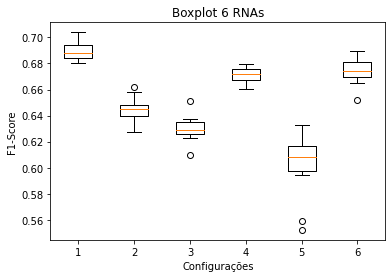

In [63]:
}dados = scores.reshape(6, 10)
dados = pd.DataFrame(data=dados)
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot 6 RNAs')
ax1.set_xlabel('Configurações')
ax1.set_ylabel('F1-Score')
ax1.boxplot(dados)
plt.show()

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
- Sim, avaliando as metricas de f1-score e acuracia é possível ver que a 1º RNA de arquitetura própria teve melhor desempenho que as demais. Porém, a mesma não apresentou resultado tão superior as redes subseguintes que são do tipo Pirâmide Geométrica.  
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
- Pirâmide Geométrica se mostrou mais producente. Porque a maioria de seus resultados foram melhores que as RNAs de arquitetura própria.
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
- No tocante a média de acurácia e média de f1-score é notável a melhoria no de desempenho de cada RNA.
4. Um número maior de épocas trouxe melhorias?
- Sim, porém somente em duas arquitetura houve mudança no número de epocas de 150 épocas para 200 épocas, entretanto a melhoria signficativa provavelmente se deu devido uso dos atributos categóricos para o treinamento das RNAs.
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?
- Definir bons parâmetros, pois acaba se tornando um trabalho exaustivo da escolha de parâmetros de forma empírica.